<div class="alert alert-success" >
  <h1>Prepare the dataset</h1>
</div>


In [188]:
import pandas as pd


## Convert xlsx to csv file

In [102]:
# Convert all sheets to csv files and save them
excel_file = '../data/dataset.xlsx'
all_sheets = pd.read_excel(excel_file, sheet_name=None)
sheets = all_sheets.keys()

for sheet_name in sheets:
    sheet = pd.read_excel(excel_file, sheet_name=sheet_name)
    sheet.to_csv("../data/sheets/%s.csv" % sheet_name, index=False)

## Load Dataset

In [103]:
import os

path_to_sheets = "C:\\Users\Honor\Documents\Past Projects\Moroccan-all-shares-index-forcasting\data\sheets"

# Create an empty dictionary to store data frames
datasets = {}

directory = os.path.join(path_to_sheets)
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            # Use the file name (without extension) as the key for the dictionary
            key = os.path.splitext(file)[0]
            # Read the CSV file and store it in the dictionary
            datasets[key] = pd.read_csv(os.path.join(root, file), encoding='utf-8')

In [104]:
# show all datasets
dfs_names = list(datasets.keys())
dfs_names

['Avoirs officiels de réserve',
 'CHANGE',
 'Indices Généraux',
 'Indices Sectorielles',
 'Indices Taux',
 'Inlfation',
 'MONIA',
 'TMP']

In [105]:
for dataset_name, dataset in datasets.items():
    print(f"Columns for dataset '{dataset_name}':")
    print(dataset.columns)
    print(50*'_')

Columns for dataset 'Avoirs officiels de réserve':
Index(['DATE', 'AVOIRS_OFFICIELS_DE_RESERVE', 'OR_MONETAIRE',
       'MONNAIES_ETRANGERES', 'DEPOTS_ET_TITRES', 'POSITION_DE_RESERVE_AU_FMI',
       'AVOIRS_EN_DTS'],
      dtype='object')
__________________________________________________
Columns for dataset 'CHANGE':
Index(['DATE_D'EXTRACTION', 'Date', 'Heure', 'Devises', 'Cours Minimum',
       'Cours Maximum'],
      dtype='object')
__________________________________________________
Columns for dataset 'Indices Généraux':
Index(['SEANCE', 'INDICE', 'COURS_CLOTURE', 'COURS_PLUS_HAUT',
       'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION'],
      dtype='object')
__________________________________________________
Columns for dataset 'Indices Sectorielles':
Index(['Étiquettes de lignes', 'AGROALIMENTAIRE & PRODUCTION', 'ASSURANCES',
       'BANQUES', 'BATIMENT & MATERIAUX DE CONSTRUCTION', 'BOISSONS', 'CHIMIE',
       'DISTRIBUTEURS', 'ELECTRICITE',
       'EQUIPEMENT

### As we see here the datasets have differents column name for the DATE column.

In [106]:
datasets['Inlfation'].head()

,MOIS,INFLATION,INFLATION_SOUS_JACENTE
0,2023-09-01 00:00:00.000,4.9,4.4
1,2023-08-01 00:00:00.000,5.0,4.7
2,2023-07-01 00:00:00.000,4.9,5.1
3,2023-06-01 00:00:00.000,5.5,5.3
4,2023-05-01 00:00:00.000,7.1,6.1


# Prepare the dataset - Merge Datasets

In [107]:
# Drop the date d'extraction because the have no to changes
datasets['CHANGE'].drop("DATE_D'EXTRACTION", axis=1, inplace=True)

In [108]:
for dataset_name, dataset in datasets.items():
    # Rename the first column to "DATE"
    dataset.rename(columns={dataset.columns[0]: "DATE"}, inplace=True)

#### convert first column to the datetime type using pandas:

In [109]:
for dataset_name, dataset in datasets.items():
    # Convert the first column to datetime type
    dataset.iloc[:, 0] = pd.to_datetime(dataset.iloc[:, 0])

# MERGE DATASETS

In [ ]:
merged_dataset = datasets['Indices Généraux']

<div class="alert alert-block alert-info">
Merge Indices Généraux et Avoirs officiels de réserve</div>


In [110]:
 datasets['Indices Généraux'].shape

(2366, 8)

In [111]:
 datasets['Avoirs officiels de réserve'].shape

(207, 7)

In [112]:


merged_dataset = pd.merge(merged_dataset, datasets['Avoirs officiels de réserve'], on=merged_dataset.columns[0], how='outer')

In [113]:
merged_dataset.isna().sum()

DATE                              0
INDICE                           27
COURS_CLOTURE                    27
COURS_PLUS_HAUT                  27
COURS_PLUS_BAS                   27
COURS_OUVERTURE                  27
COURS_VEILLE                     27
VARIATION                        27
AVOIRS_OFFICIELS_DE_RESERVE    2186
OR_MONETAIRE                   2186
MONNAIES_ETRANGERES            2186
DEPOTS_ET_TITRES               2186
POSITION_DE_RESERVE_AU_FMI     2186
AVOIRS_EN_DTS                  2186
dtype: int64

<div class="alert alert-block alert-info">
Merge with Inlfation</div>

In [114]:
 datasets['Inlfation'].head()

,DATE,INFLATION,INFLATION_SOUS_JACENTE
0,2023-09-01,4.9,4.4
1,2023-08-01,5.0,4.7
2,2023-07-01,4.9,5.1
3,2023-06-01,5.5,5.3
4,2023-05-01,7.1,6.1


In [121]:
merged_dataset.columns

Index(['DATE', 'INDICE', 'COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS',
       'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION',
       'AVOIRS_OFFICIELS_DE_RESERVE', 'OR_MONETAIRE', 'MONNAIES_ETRANGERES',
       'DEPOTS_ET_TITRES', 'POSITION_DE_RESERVE_AU_FMI', 'AVOIRS_EN_DTS',
       'INFLATION', 'INFLATION_SOUS_JACENTE'],
      dtype='object')

In [116]:
 datasets['Inlfation'].columns

Index(['DATE', 'INFLATION', 'INFLATION_SOUS_JACENTE'], dtype='object')

In [117]:
# Extract month from 'DATE' column in both datasets
merged_dataset['Month'] = merged_dataset['DATE'].dt.month
datasets['Inlfation']['Month'] =  datasets['Inlfation']['DATE'].dt.month

# # Merge datasets based on 'Month' column
merged_dataset = pd.merge(merged_dataset, datasets['Inlfation'], on='Month')


In [120]:
# # Drop the 'Month' column 
merged_dataset.drop(['Month','DATE_y'], axis=1, inplace=True)
# rename
merged_dataset.rename(columns={'DATE_x': 'DATE'}, inplace=True)


KeyError: "['Month', 'DATE_y'] not found in axis"

In [122]:
merged_dataset.isna().sum()

DATE                              0
INDICE                           44
COURS_CLOTURE                    44
COURS_PLUS_HAUT                  44
COURS_PLUS_BAS                   44
COURS_OUVERTURE                  44
COURS_VEILLE                     44
VARIATION                        44
AVOIRS_OFFICIELS_DE_RESERVE    3831
OR_MONETAIRE                   3831
MONNAIES_ETRANGERES            3831
DEPOTS_ET_TITRES               3831
POSITION_DE_RESERVE_AU_FMI     3831
AVOIRS_EN_DTS                  3831
INFLATION                         0
INFLATION_SOUS_JACENTE            0
dtype: int64

<div class="alert alert-block alert-info">
Merge with CHANGE</div>

In [123]:
 datasets['CHANGE'].shape

(1000, 5)

In [124]:
 datasets['CHANGE']

,DATE,Heure,Devises,Cours Minimum,Cours Maximum
0,2023-12-08,08:30:00.0000000,1 Dollar u.s.a.,9.4657,10.4621
1,2023-12-08,11:54:52.0000000,1 Dollar u.s.a.,9.4610,10.4569
2,2023-12-07,08:30:00.0000000,1 Dollar u.s.a.,9.4681,10.4648
3,2023-12-07,11:54:59.0000000,1 Dollar u.s.a.,9.4679,10.4645
4,2023-12-06,08:30:00.0000000,1 Dollar u.s.a.,9.4607,10.4566
...,...,...,...,...,...
995,2021-12-24,11:54:00.0000000,1 Dollar u.s.a.,9.1776,10.1436
996,2021-12-23,08:30:00.0000000,1 Dollar u.s.a.,9.1793,10.1456
997,2021-12-23,11:53:34.0000000,1 Dollar u.s.a.,9.1821,10.1486
998,2021-12-22,08:30:00.0000000,1 Dollar u.s.a.,9.2136,10.1834


In [125]:
merged_dataset = pd.merge(merged_dataset, datasets['CHANGE'], on=merged_dataset.columns[0], how='outer')

In [126]:
merged_dataset.shape

(5074, 20)

In [127]:
merged_dataset.isna().sum()

DATE                              0
INDICE                           64
COURS_CLOTURE                    64
COURS_PLUS_HAUT                  64
COURS_PLUS_BAS                   64
COURS_OUVERTURE                  64
COURS_VEILLE                     64
VARIATION                        64
AVOIRS_OFFICIELS_DE_RESERVE    4527
OR_MONETAIRE                   4527
MONNAIES_ETRANGERES            4527
DEPOTS_ET_TITRES               4527
POSITION_DE_RESERVE_AU_FMI     4527
AVOIRS_EN_DTS                  4527
INFLATION                        20
INFLATION_SOUS_JACENTE           20
Heure                          3340
Devises                        3340
Cours Minimum                  3340
Cours Maximum                  3340
dtype: int64

<div class="alert alert-block alert-info">
Merge with Indices Taux</div>

In [128]:
merged_dataset = pd.merge(merged_dataset, datasets['Indices Taux'], on=merged_dataset.columns[0], how='outer')

<div class="alert alert-block alert-info">
Merge with Indices Sectorielles</div>

In [129]:
merged_dataset = pd.merge(merged_dataset, datasets['Indices Sectorielles'], on=merged_dataset.columns[0], how='outer')

<div class="alert alert-block alert-info">
Merge with MONIA</div>

In [130]:
merged_dataset = pd.merge(merged_dataset, datasets['MONIA'], on=merged_dataset.columns[0], how='outer')

<div class="alert alert-block alert-info">
Merge with TMP</div>

In [131]:
merged_dataset = pd.merge(merged_dataset, datasets['TMP'], on=merged_dataset.columns[0], how='outer')

<hr>

In [132]:
merged_dataset.head()

,DATE,INDICE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,...,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS
0,2023-12-08,MASI,11885.32,11885.32,11824.97,11827.02,11827.02,0.49,NaN,NaN,...,1037.58,5613.63,28.52,1417.95,2394.99,NaN,NaN,NaN,NaN,NaN
1,2023-12-08,MASI,11885.32,11885.32,11824.97,11827.02,11827.02,0.49,NaN,NaN,...,1037.58,5613.63,28.52,1417.95,2394.99,NaN,NaN,NaN,NaN,NaN
2,2023-12-07,MASI,11827.02,11827.02,11757.60,11757.60,11757.60,0.59,NaN,NaN,...,1048.54,5615.34,28.39,1401.65,2394.99,NaN,NaN,3.0,2199.0,7769.0
3,2023-12-07,MASI,11827.02,11827.02,11757.60,11757.60,11757.60,0.59,NaN,NaN,...,1048.54,5615.34,28.39,1401.65,2394.99,NaN,NaN,3.0,2199.0,7769.0
4,2023-12-06,MASI,11757.60,11792.95,11718.07,11759.51,11759.51,-0.02,NaN,NaN,...,1040.29,5615.34,29.13,1375.24,2390.88,2.936,10072.0,3.0,2389.0,7669.0


In [133]:
merged_dataset.shape

(5458, 61)

In [139]:
merged_dataset.count()

DATE                  5010
INDICE                5010
COURS_CLOTURE         5010
COURS_PLUS_HAUT       5010
COURS_PLUS_BAS        5010
                      ... 
Indice MONIA          2383
Volume JJ             2383
TAUX MOYEN PONDERE    1943
VOLUME JJ             1943
ENCOURS               1943
Length: 61, dtype: int64

In [140]:
merged_dataset.DATE

0      2023-12-08
1      2023-12-08
2      2023-12-07
3      2023-12-07
4      2023-12-06
          ...    
5049   2014-01-06
5050   2014-01-03
5051   2014-01-03
5052   2014-01-02
5053   2014-01-02
Name: DATE, Length: 5010, dtype: datetime64[ns]

In [175]:
# Set the DATE column as the index if it's not already
merged_dataset['DATE'] = pd.to_datetime(merged_dataset['DATE'])  
merged_dataset.set_index('DATE', inplace=True)

# sort the merged_dataset by DATE
merged_dataset = merged_dataset.sort_values(by='DATE', ascending=True)

KeyError: 'DATE'

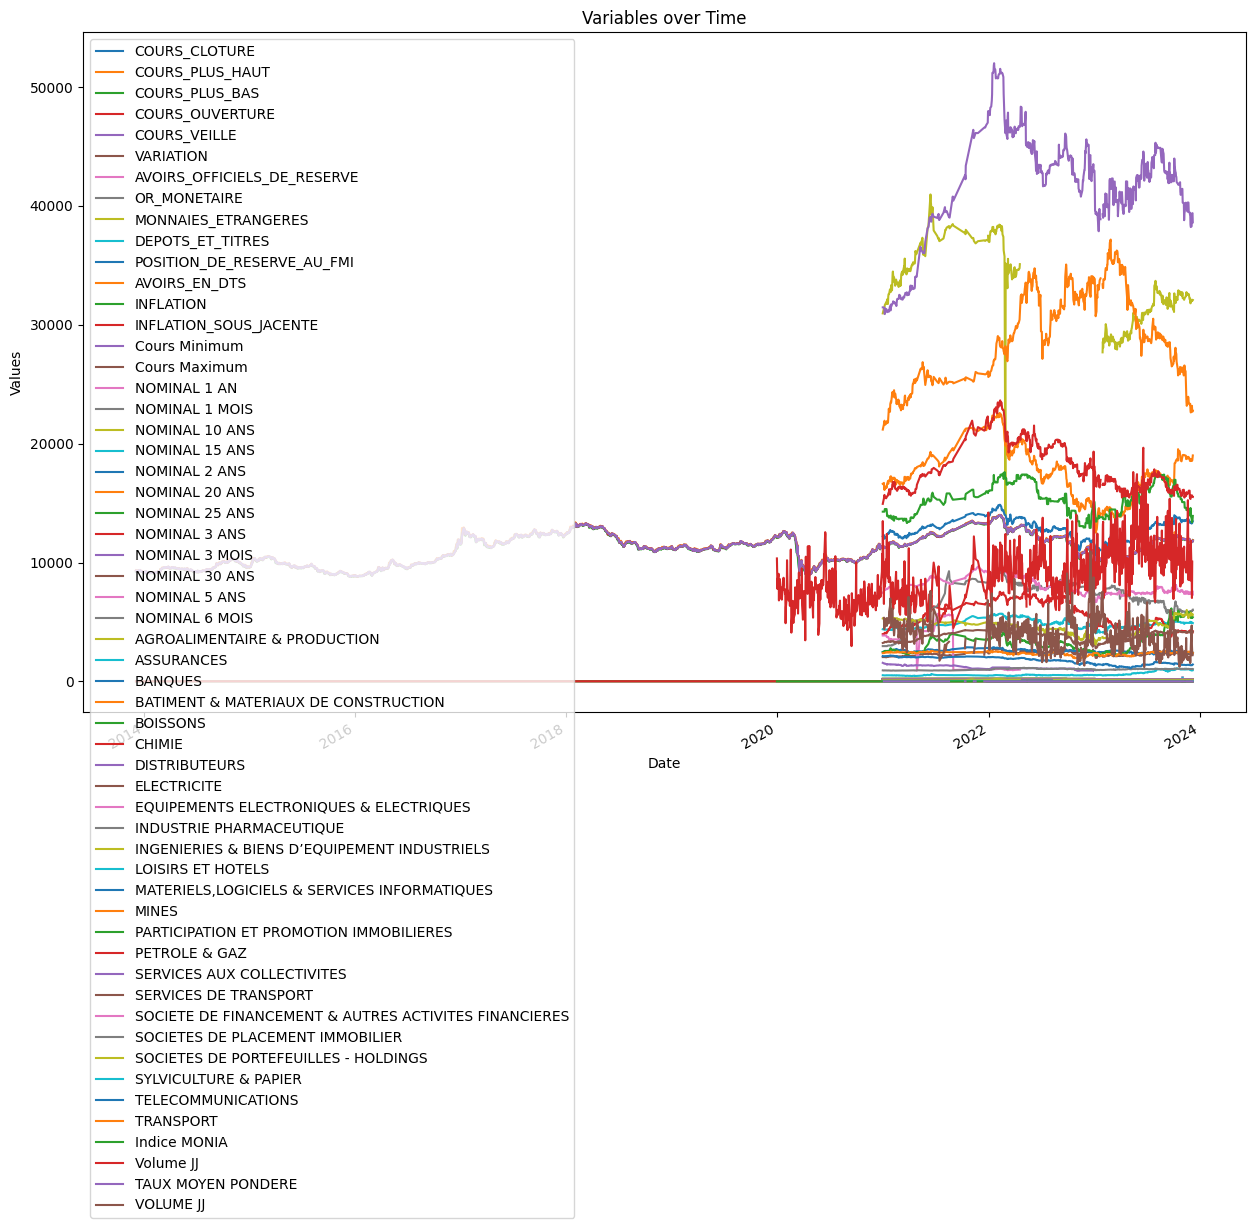

In [148]:
import matplotlib.pyplot as plt


# Select columns for visualization
columns_to_visualize = [
    'COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS',
    'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION', 'AVOIRS_OFFICIELS_DE_RESERVE',
    'OR_MONETAIRE', 'MONNAIES_ETRANGERES', 'DEPOTS_ET_TITRES',
    'POSITION_DE_RESERVE_AU_FMI', 'AVOIRS_EN_DTS', 'INFLATION',
    'INFLATION_SOUS_JACENTE', 'Heure', 'Devises', 'Cours Minimum', 'Cours Maximum',
    'NOMINAL 1 AN', 'NOMINAL 1 MOIS', 'NOMINAL 10 ANS', 'NOMINAL 15 ANS',
    'NOMINAL 2 ANS', 'NOMINAL 20 ANS', 'NOMINAL 25 ANS', 'NOMINAL 3 ANS',
    'NOMINAL 3 MOIS', 'NOMINAL 30 ANS', 'NOMINAL 5 ANS', 'NOMINAL 6 MOIS',
    'AGROALIMENTAIRE & PRODUCTION', 'ASSURANCES', 'BANQUES',
    'BATIMENT & MATERIAUX DE CONSTRUCTION', 'BOISSONS', 'CHIMIE',
    'DISTRIBUTEURS', 'ELECTRICITE', 'EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES',
    'INDUSTRIE PHARMACEUTIQUE', 'INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS',
    'LOISIRS ET HOTELS', 'MATERIELS,LOGICIELS & SERVICES INFORMATIQUES',
    'MINES', 'PARTICIPATION ET PROMOTION IMMOBILIERES', 'PETROLE & GAZ',
    'SERVICES AUX COLLECTIVITES', 'SERVICES DE TRANSPORT',
    'SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES',
    'SOCIETES DE PLACEMENT IMMOBILIER', 'SOCIETES DE PORTEFEUILLES - HOLDINGS',
    'SYLVICULTURE & PAPIER', 'TELECOMMUNICATIONS', 'TRANSPORT', 'Indice MONIA',
    'Volume JJ', 'TAUX MOYEN PONDERE', 'VOLUME JJ'
]

# Plotting
merged_dataset[columns_to_visualize].plot(figsize=(15, 10), title='Variables over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()


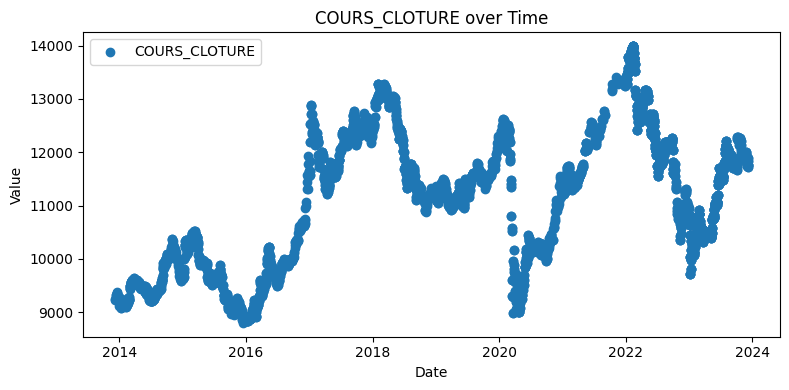

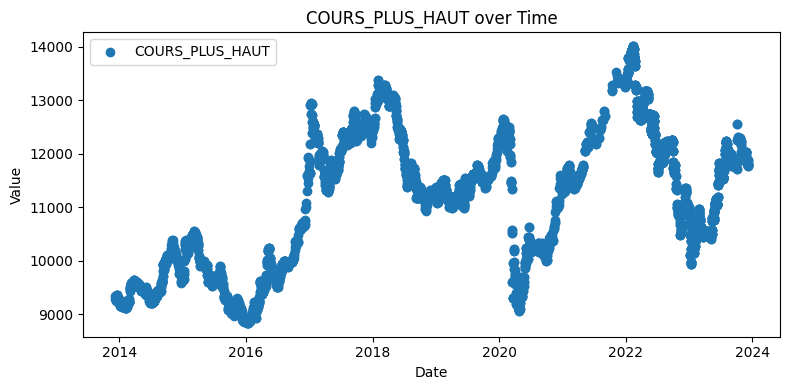

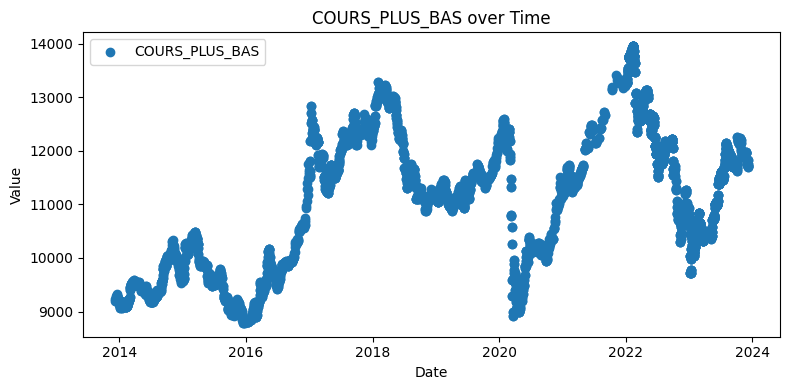

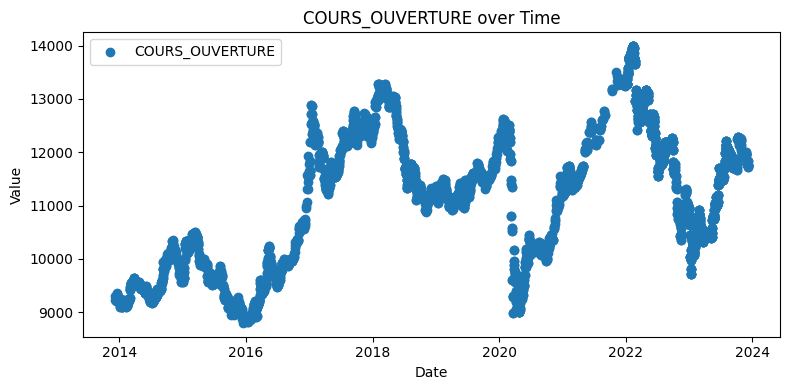

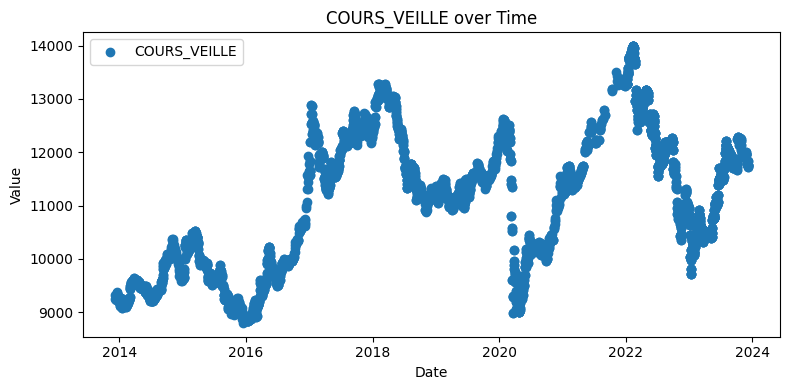

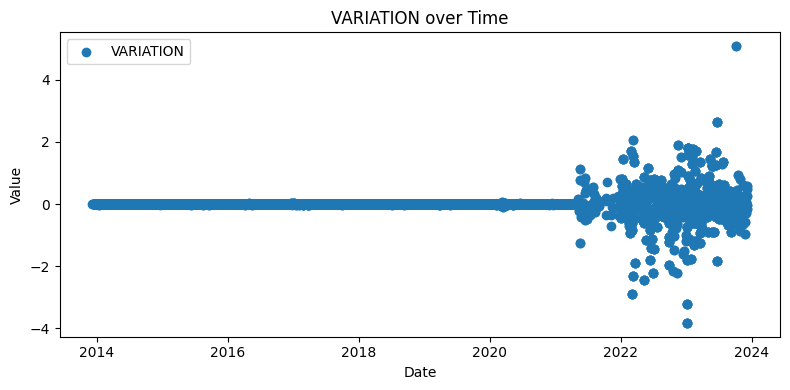

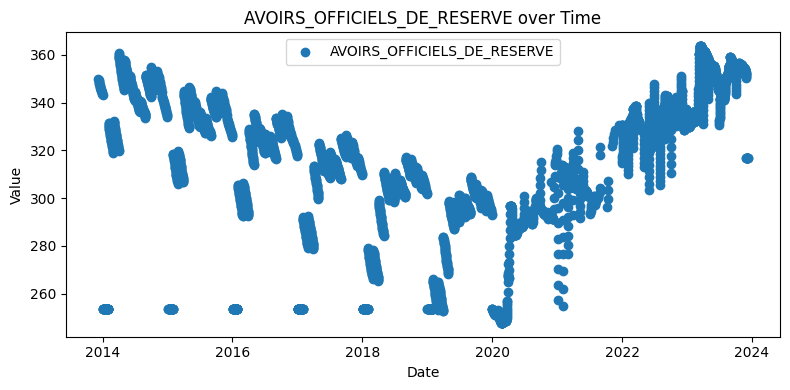

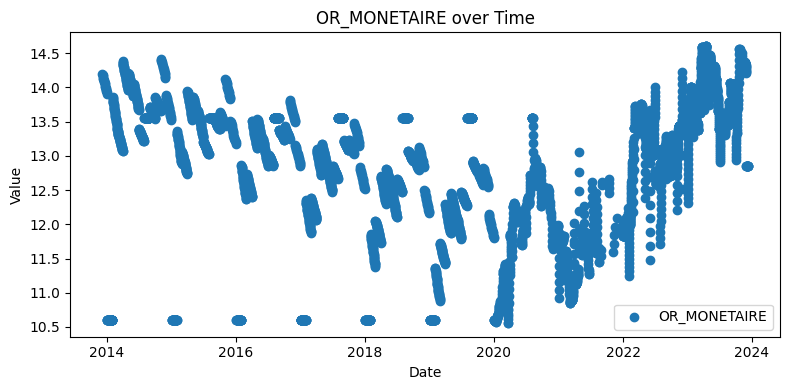

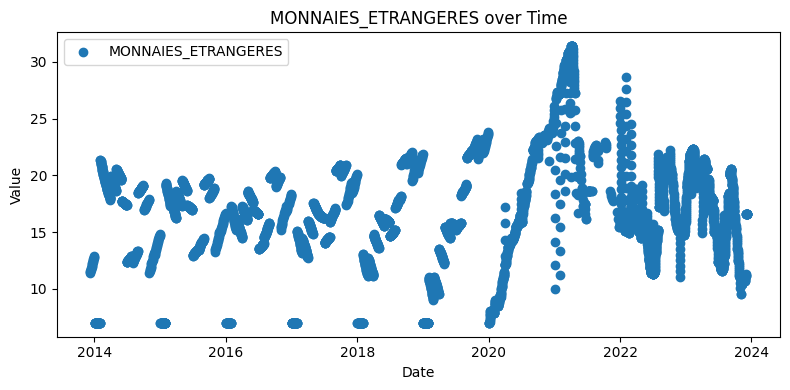

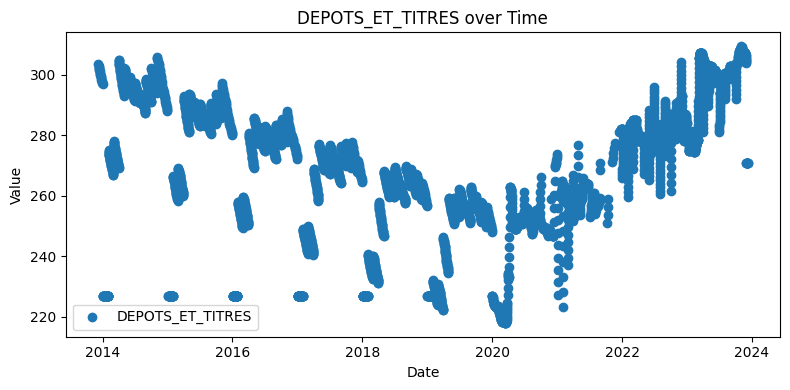

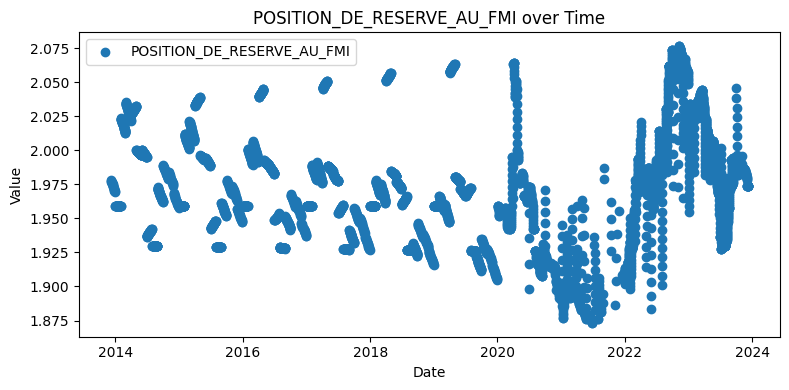

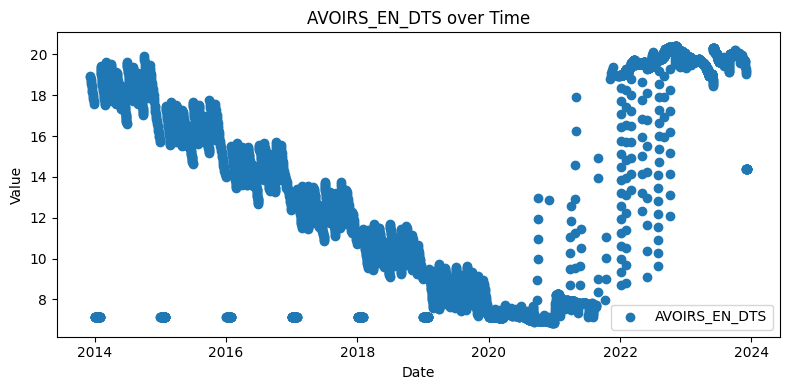

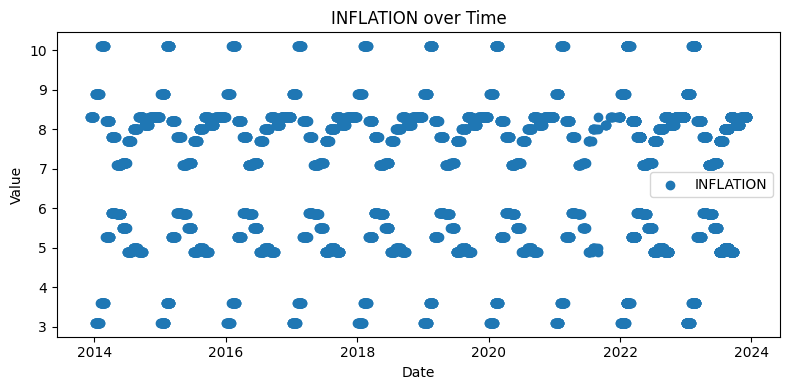

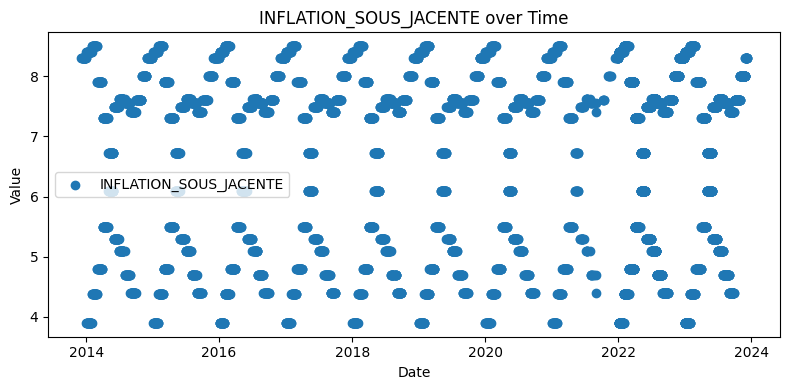

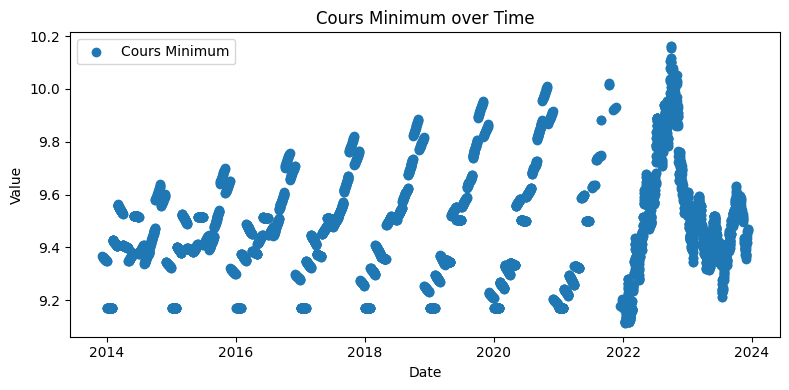

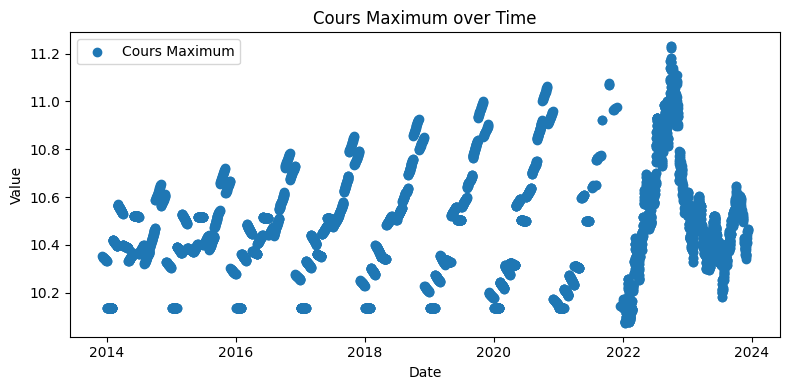

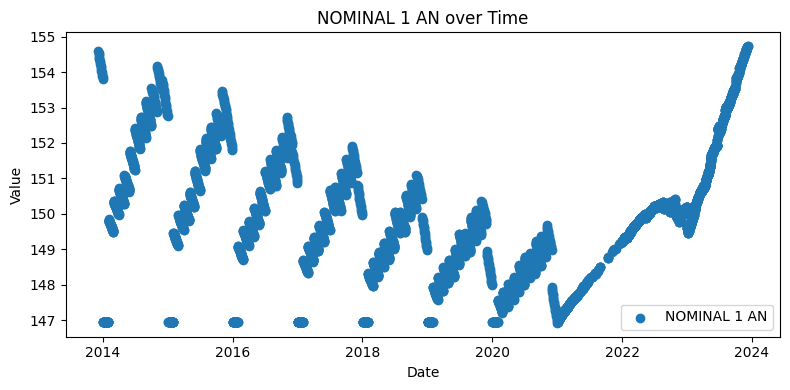

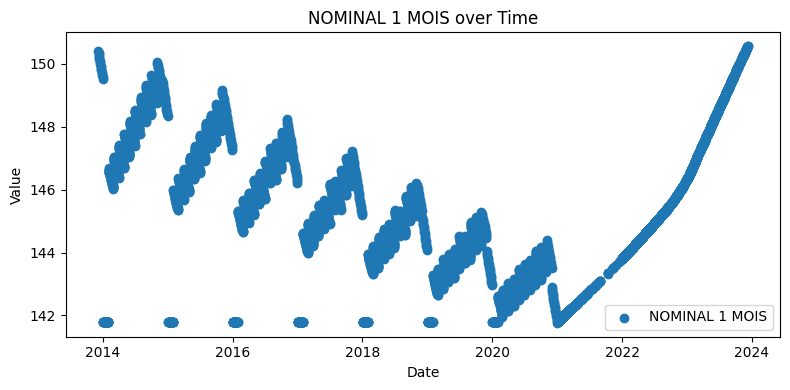

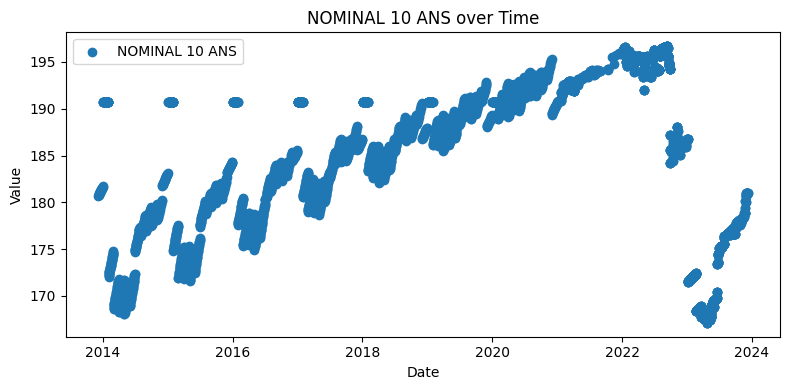

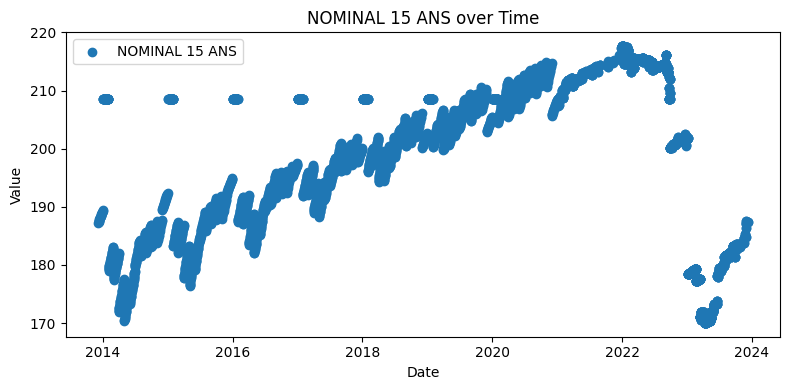

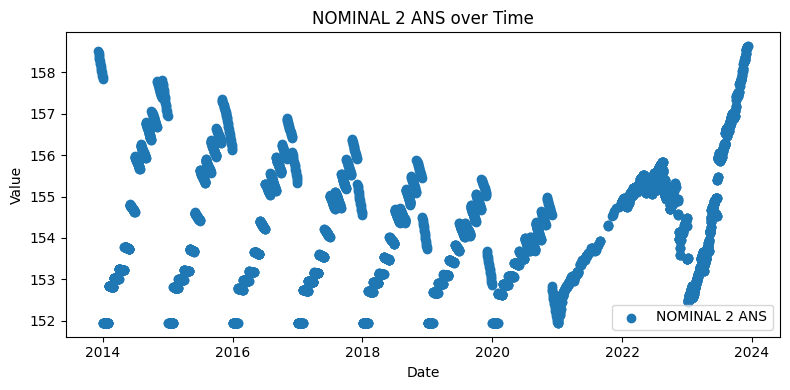

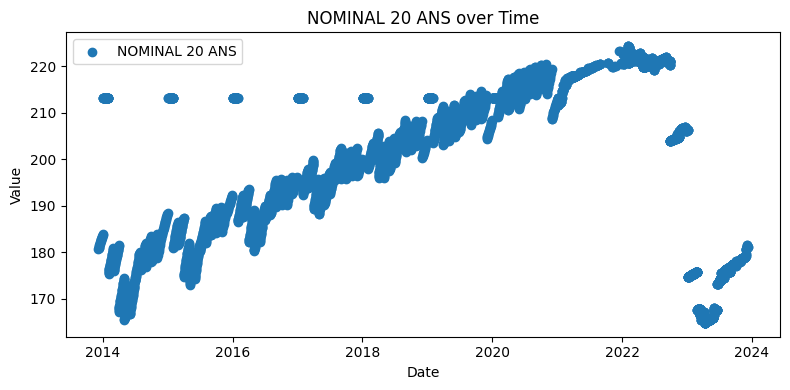

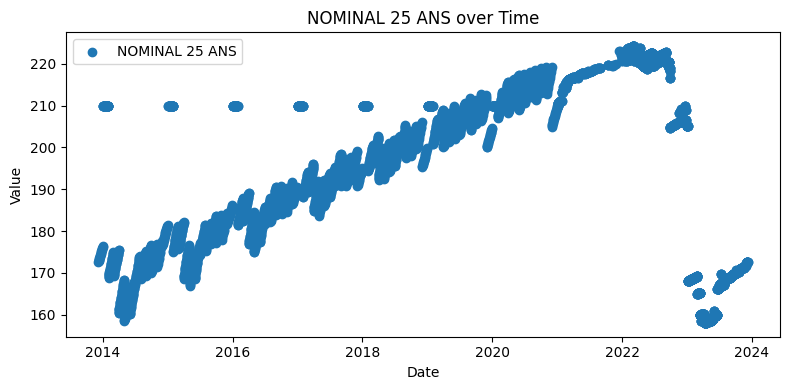

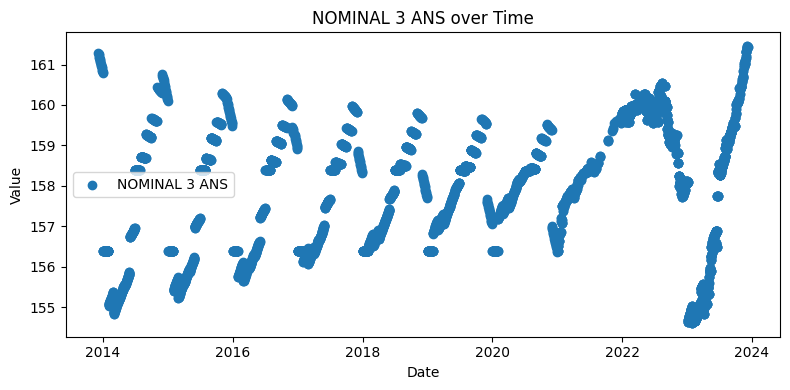

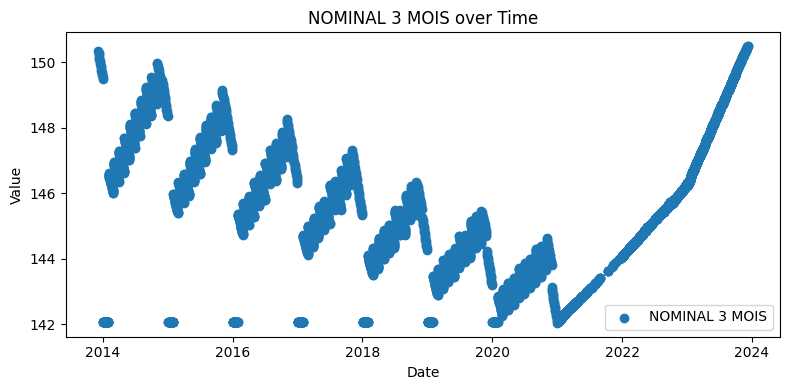

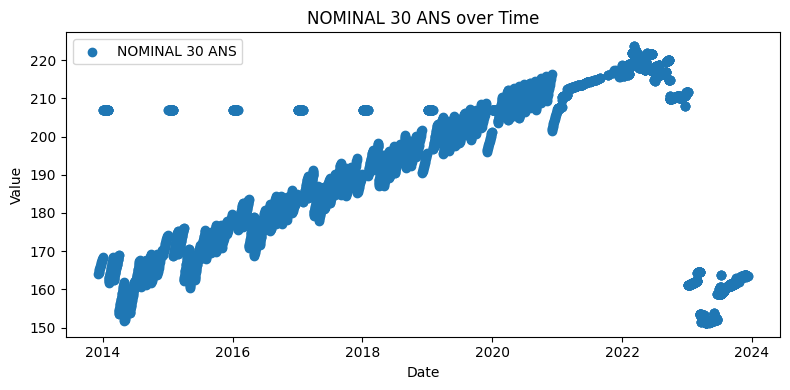

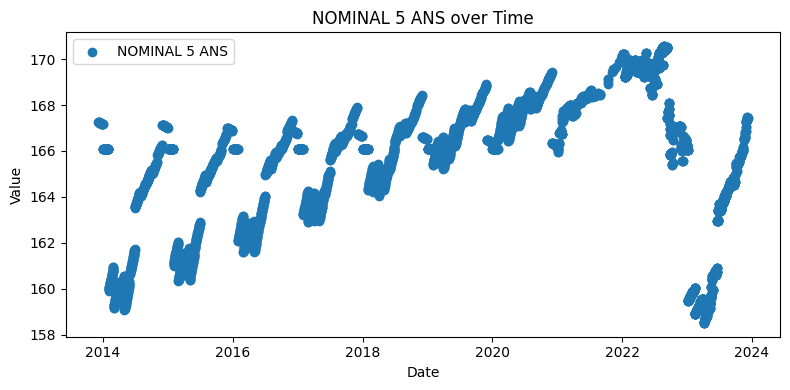

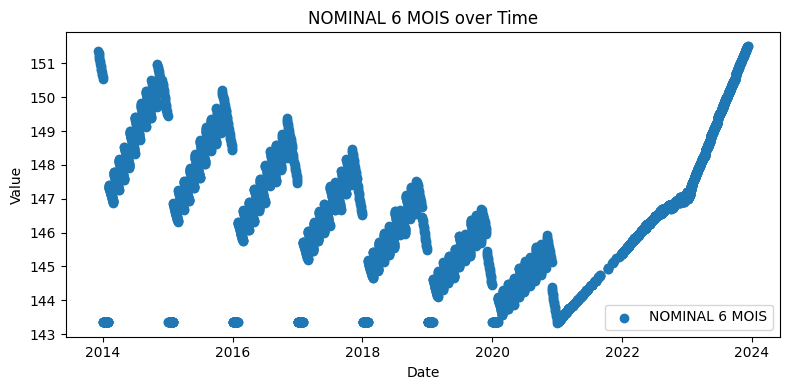

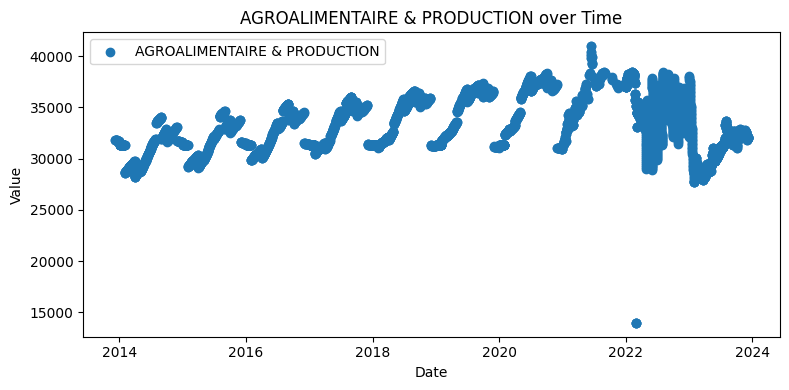

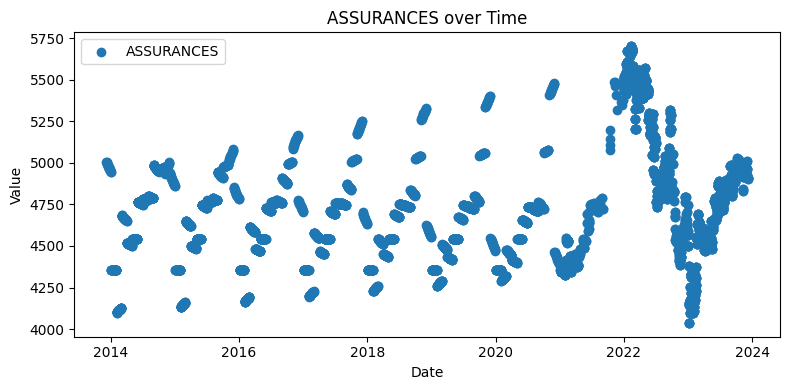

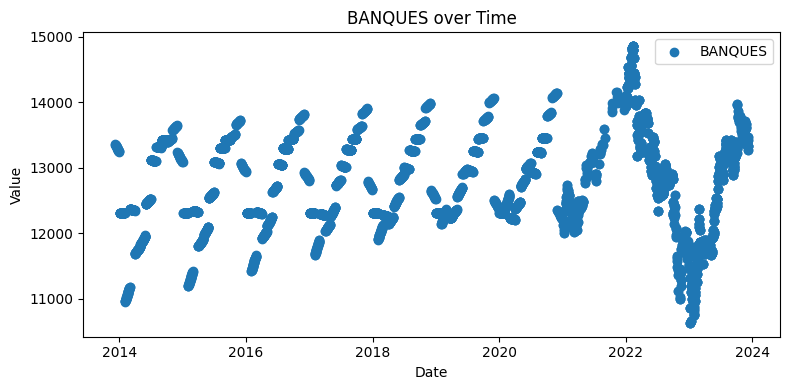

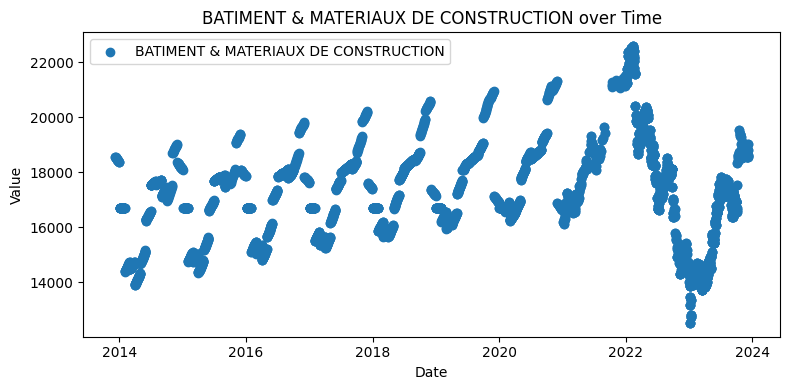

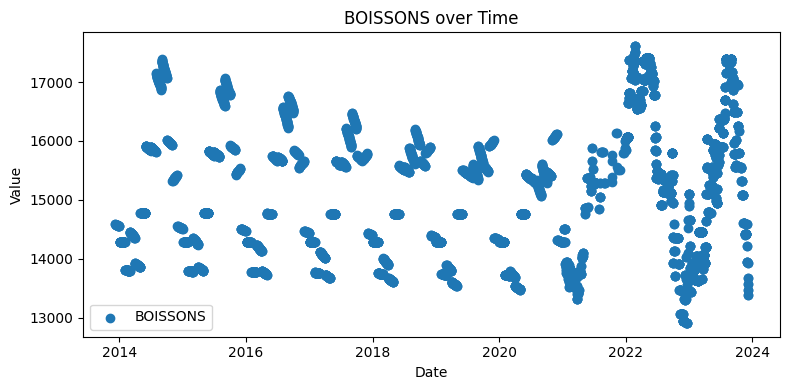

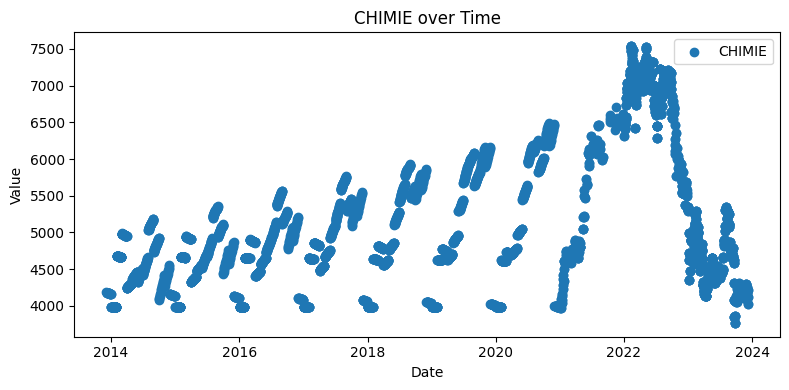

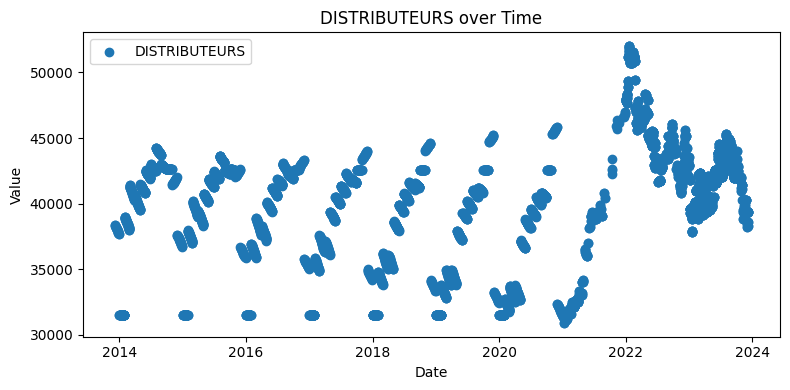

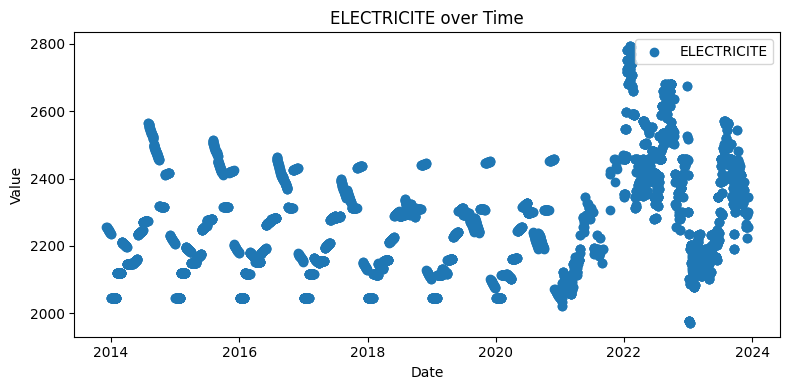

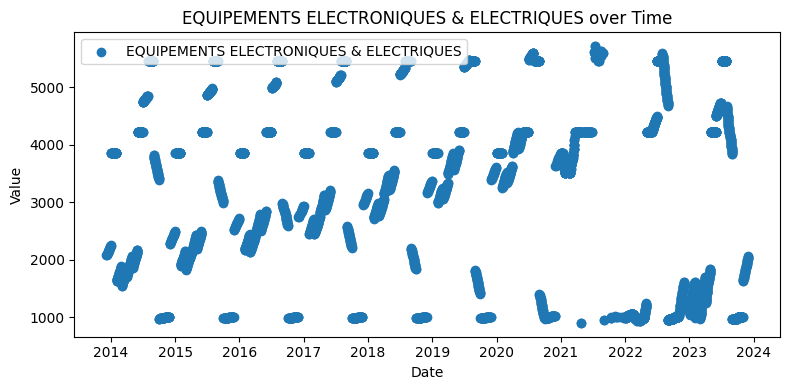

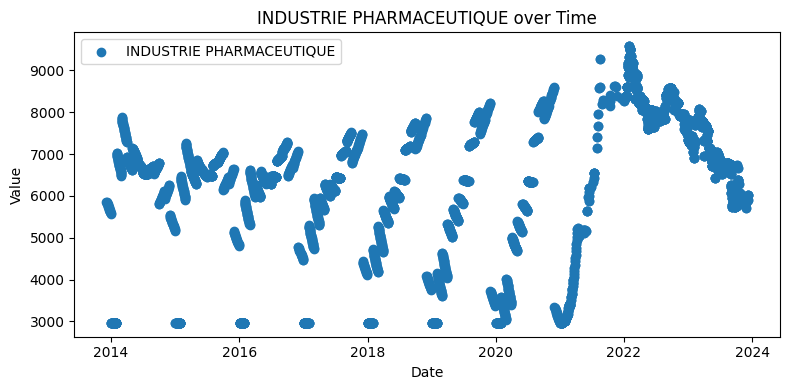

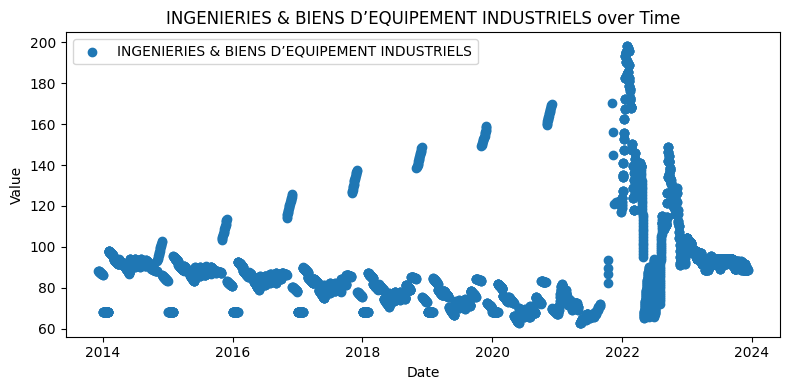

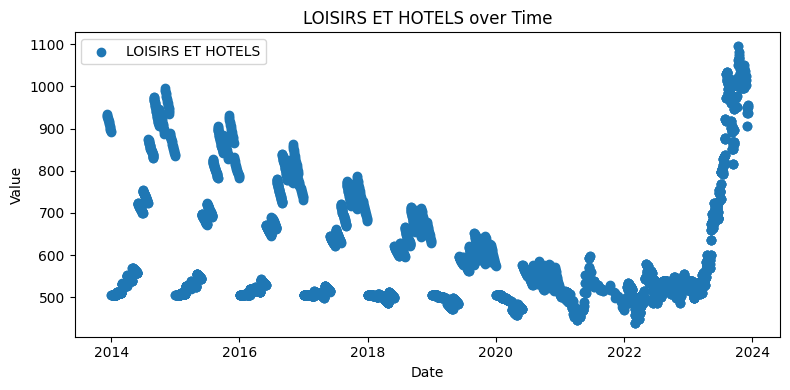

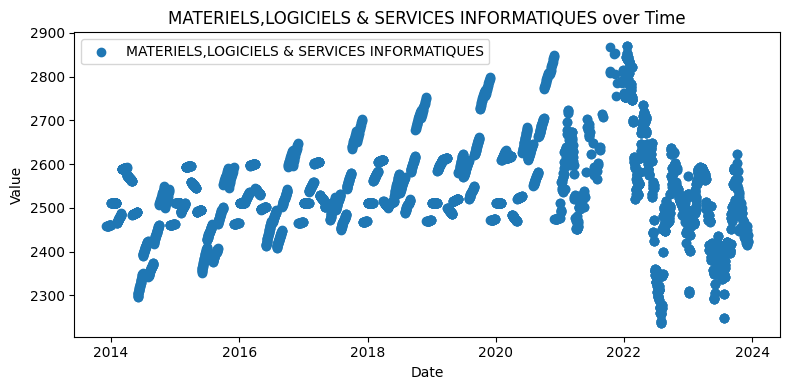

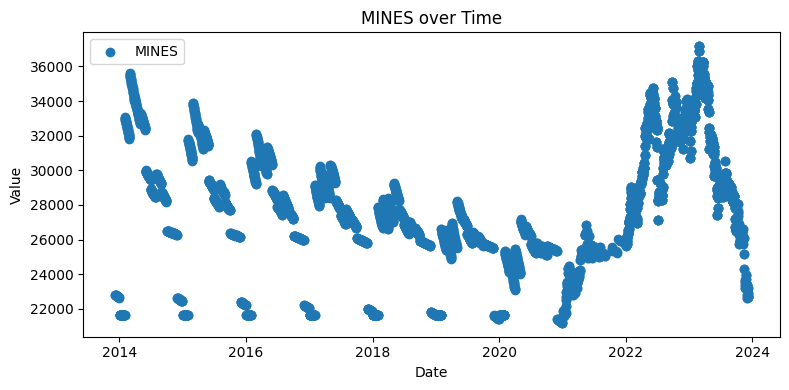

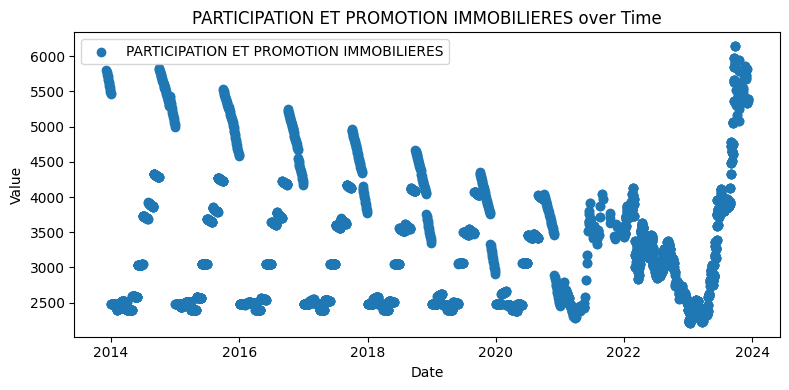

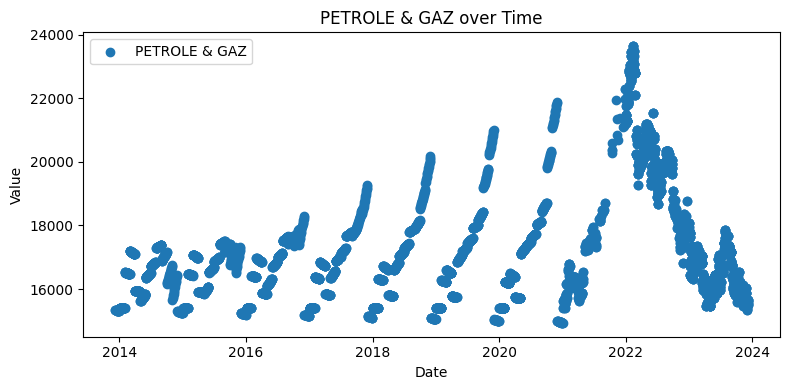

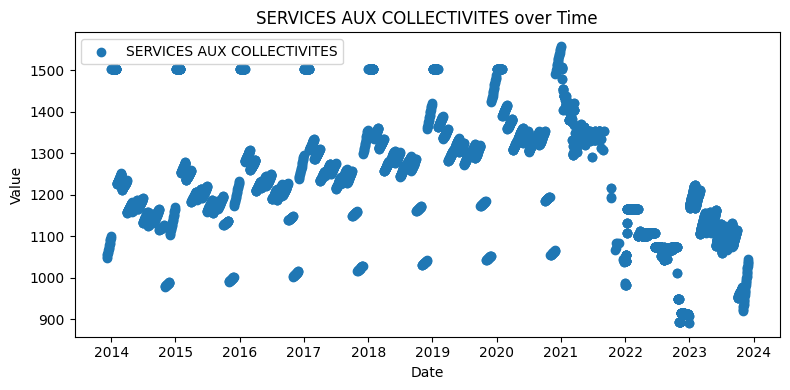

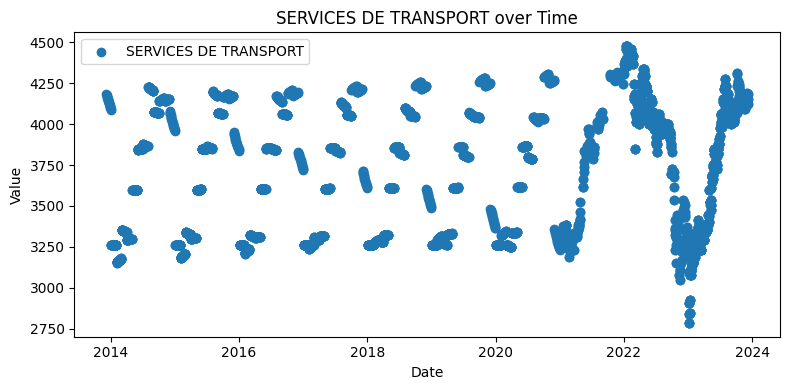

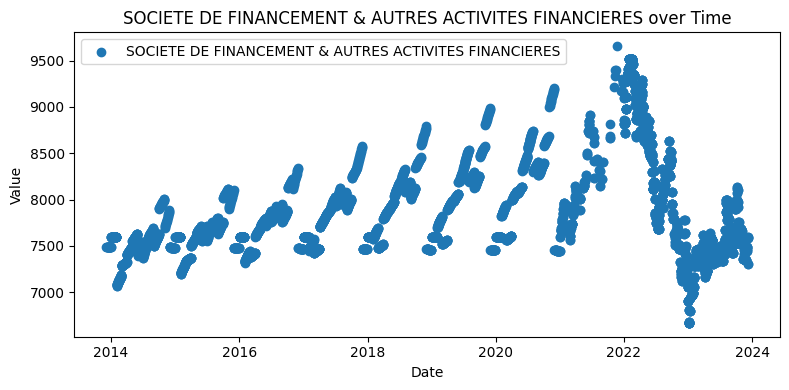

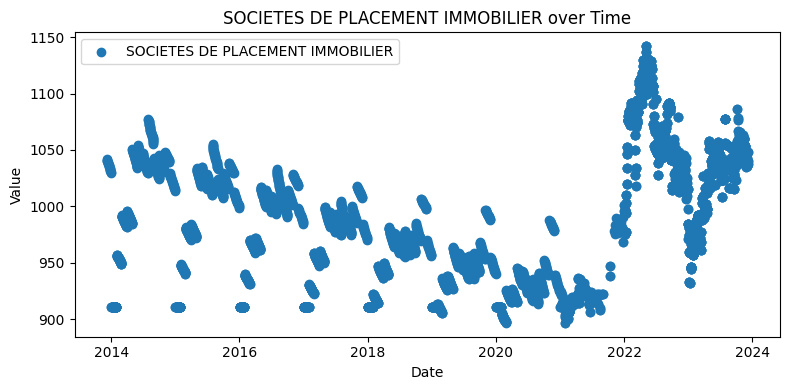

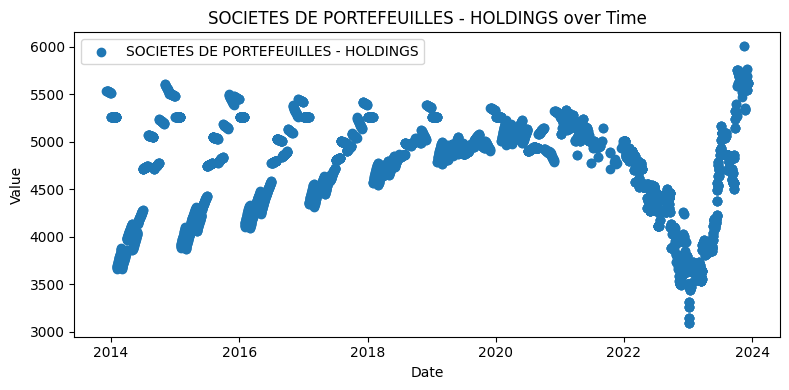

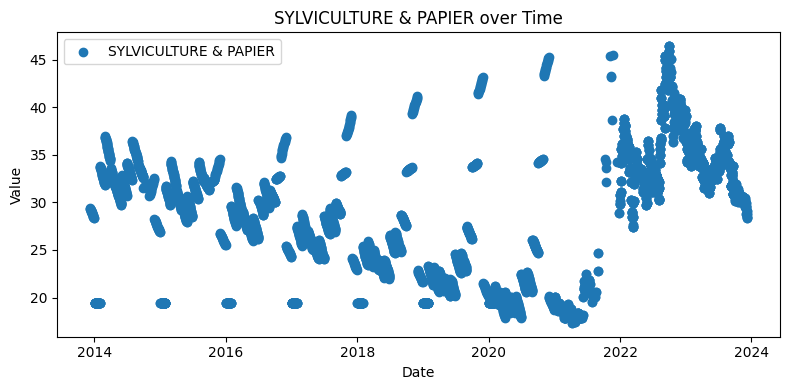

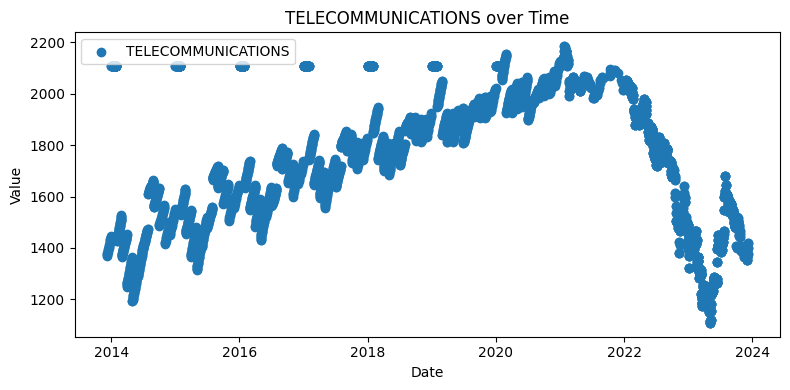

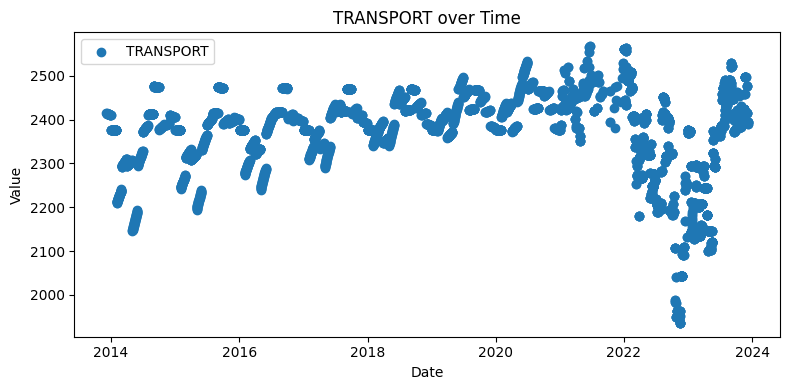

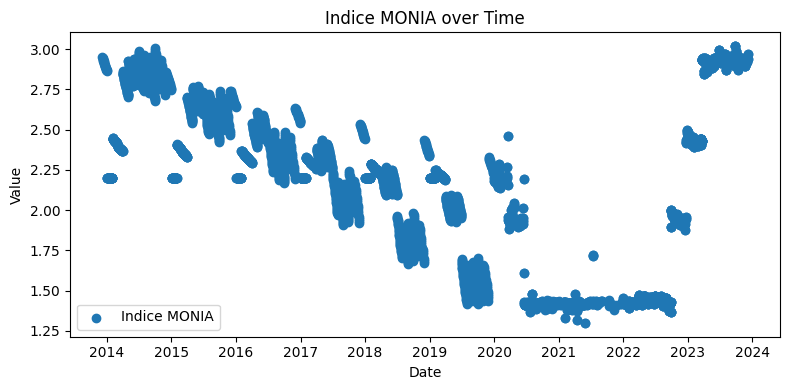

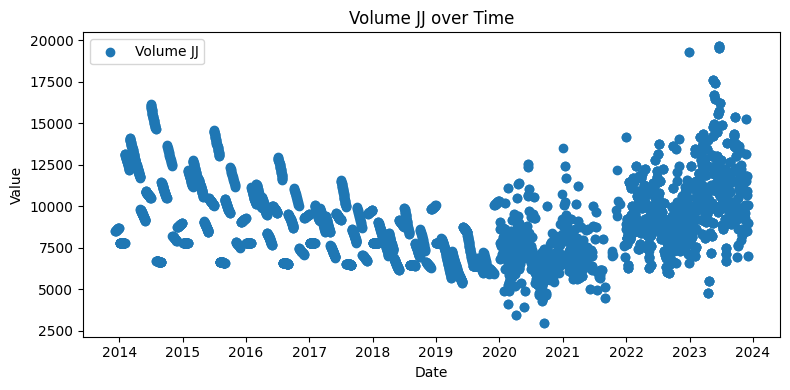

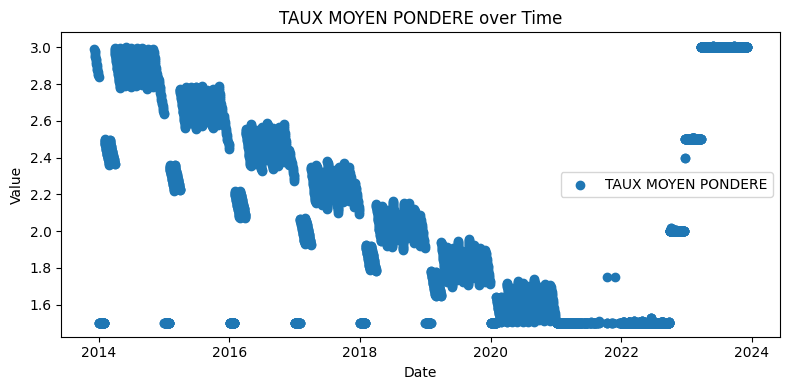

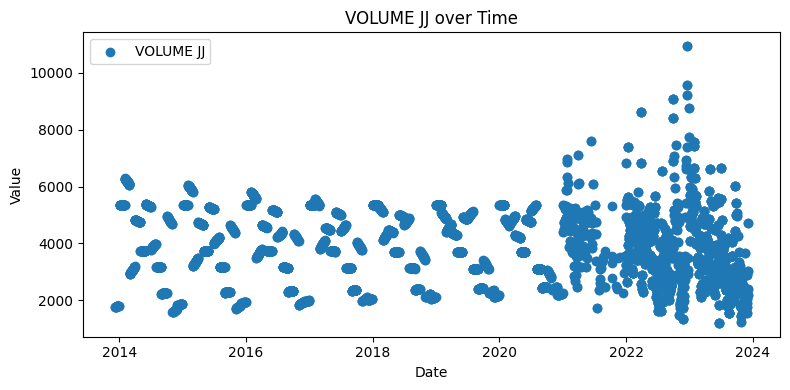

In [174]:
# PLOTING the variables to get an idea

import matplotlib.pyplot as plt

# Assuming merged_dataset is your DataFrame with the columns you provided
# Replace merged_dataset with the actual name of your DataFrame

# Set the DATE column as the index if it's not already
# merged_dataset['DATE'] = pd.to_datetime(merged_dataset['DATE'])  
# merged_dataset.set_index('DATE', inplace=True)

# Select columns for visualization
columns_to_visualize = [
    'COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS',
    'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION', 'AVOIRS_OFFICIELS_DE_RESERVE',
    'OR_MONETAIRE', 'MONNAIES_ETRANGERES', 'DEPOTS_ET_TITRES',
    'POSITION_DE_RESERVE_AU_FMI', 'AVOIRS_EN_DTS', 'INFLATION',
    'INFLATION_SOUS_JACENTE', 'Cours Minimum', 'Cours Maximum',
    'NOMINAL 1 AN', 'NOMINAL 1 MOIS', 'NOMINAL 10 ANS', 'NOMINAL 15 ANS',
    'NOMINAL 2 ANS', 'NOMINAL 20 ANS', 'NOMINAL 25 ANS', 'NOMINAL 3 ANS',
    'NOMINAL 3 MOIS', 'NOMINAL 30 ANS', 'NOMINAL 5 ANS', 'NOMINAL 6 MOIS',
    'AGROALIMENTAIRE & PRODUCTION', 'ASSURANCES', 'BANQUES',
    'BATIMENT & MATERIAUX DE CONSTRUCTION', 'BOISSONS', 'CHIMIE',
    'DISTRIBUTEURS', 'ELECTRICITE', 'EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES',
    'INDUSTRIE PHARMACEUTIQUE', 'INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS',
    'LOISIRS ET HOTELS', 'MATERIELS,LOGICIELS & SERVICES INFORMATIQUES',
    'MINES', 'PARTICIPATION ET PROMOTION IMMOBILIERES', 'PETROLE & GAZ',
    'SERVICES AUX COLLECTIVITES', 'SERVICES DE TRANSPORT',
    'SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES',
    'SOCIETES DE PLACEMENT IMMOBILIER', 'SOCIETES DE PORTEFEUILLES - HOLDINGS',
    'SYLVICULTURE & PAPIER', 'TELECOMMUNICATIONS', 'TRANSPORT', 'Indice MONIA',
    'Volume JJ', 'TAUX MOYEN PONDERE', 'VOLUME JJ'
]
# Plotting each variable in a separate plot
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    plt.scatter(merged_dataset.index, merged_dataset[column], label=column)
    plt.title(f'{column} over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

We can see that The variation variable from 2014 to 2021 has the value = 0,
So I think that the value was filled using a not good method

Also we see the value have a patterns so we will use the interpolate to fill missing value

<div class="alert alert-warning">
<b> Handle missing value  </b> 
</div>

In [178]:
merged_dataset.isna().sum()

COURS_CLOTURE                                            0
COURS_PLUS_HAUT                                          0
COURS_PLUS_BAS                                           0
COURS_OUVERTURE                                          0
COURS_VEILLE                                             0
VARIATION                                                0
AVOIRS_OFFICIELS_DE_RESERVE                              0
OR_MONETAIRE                                             0
MONNAIES_ETRANGERES                                      0
DEPOTS_ET_TITRES                                         0
POSITION_DE_RESERVE_AU_FMI                               0
AVOIRS_EN_DTS                                            0
INFLATION                                                0
INFLATION_SOUS_JACENTE                                   0
Cours Minimum                                            0
Cours Maximum                                            0
NOMINAL 1 AN                                            

<div class="alert alert-warning">
<b> Note:  </b> We will drop all miising value from the indice generaux. because they are our target to predict:
</div>

In [136]:
merged_dataset.dropna(subset=['INDICE',"COURS_CLOTURE",'COURS_PLUS_HAUT','COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION'], inplace=True)

<div class="alert alert-warning">
The Indice, Heure and Devises hase quasi-value for all the rows so they will not affect the accuraccy of our model.
So we can delete them</div>

In [167]:
columns_to_drop = ['Heure', 'Devises', 'INDICE']

# Drop specified columns
merged_dataset.drop(columns=columns_to_drop, inplace=True)

<div class="alert alert-warning">
Iterate through each column and fill missing values with the mean between previous and next values</div>

In [162]:
for column in merged_dataset.columns:
    merged_dataset[column].interpolate(method='linear', inplace=True)

<div class="alert alert-warning">
the choice depends on the nature of your data and the problem at hand and here we can see that the "Avoirs officiels de réserve" dataset has the values of each columns close to each other so no deviation. That is why I choose theCommon techniques imputation with the mean.</div>

In [171]:
merged_dataset['AVOIRS_OFFICIELS_DE_RESERVE'].fillna(merged_dataset['AVOIRS_OFFICIELS_DE_RESERVE'].mean(), inplace=True)
merged_dataset['OR_MONETAIRE'].fillna(merged_dataset['OR_MONETAIRE'].mean(), inplace=True)
merged_dataset['DEPOTS_ET_TITRES'].fillna(merged_dataset['DEPOTS_ET_TITRES'].mean(), inplace=True)
merged_dataset['POSITION_DE_RESERVE_AU_FMI'].fillna(merged_dataset['POSITION_DE_RESERVE_AU_FMI'].mean(), inplace=True)
merged_dataset['AVOIRS_EN_DTS'].fillna(merged_dataset['AVOIRS_EN_DTS'].mean(), inplace=True)
merged_dataset['MONNAIES_ETRANGERES'].fillna(merged_dataset['MONNAIES_ETRANGERES'].mean(), inplace=True)

<div class="alert alert-warning">
And for Cours Minimum and Cours Maximum we will take the last value for missing value in those columns:</div>

In [156]:
# Use the values from the previous  row to fill missing values.
merged_dataset['Cours Minimum'].fillna(method='ffill', inplace=True)
merged_dataset['Cours Maximum'].fillna(method='ffill', inplace=True)

<div class="alert alert-warning">
drop columns with more than 90% NaN values</div>

In [200]:
threshold = 0.9 * len(merged_dataset)  

# Drop columns with more than 50% NaN values
merged_dataset.dropna(thresh=threshold, axis=1, inplace=True)

<div class="alert alert-warning">
All the columns now 90% are note nan value
- Drop all rows that contain at least one NaN value</div>

In [176]:
merged_dataset.dropna(axis=0, inplace=True)

In [179]:
merged_dataset.isna().sum().sum()

0

In [180]:
merged_dataset.head()

,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,...,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS
DATE,,,,,,,,,,,,,,,,,,,,,
2021-12-31,13358.32,13425.50,13352.00,13404.63,13404.63,-0.35,330.831808,12.008623,15.920088,281.985439,...,1001.080017,5008.120117,29.809999,2046.709961,2562.300049,1.456,14202.0,1.5,4917.0,8607.0
2021-12-31,13358.32,13425.50,13352.00,13404.63,13404.63,-0.35,330.831808,12.008623,15.920088,281.985439,...,1001.080017,5008.120117,29.809999,2046.709961,2562.300049,1.456,14202.0,1.5,4917.0,8607.0
2021-12-30,13404.63,13405.19,13340.30,13389.20,13389.20,0.12,330.697598,11.983168,15.826980,281.982649,...,996.340027,5008.120117,29.820000,2043.770020,2562.300049,1.437,8915.0,1.5,5357.0,9287.0
2021-12-30,13404.63,13405.19,13340.30,13389.20,13389.20,0.12,330.563387,11.957713,15.733872,281.979859,...,996.340027,5008.120117,29.820000,2043.770020,2562.300049,1.437,8915.0,1.5,5357.0,9287.0
2021-12-29,13389.20,13389.70,13280.96,13281.80,13281.80,0.81,330.429177,11.932258,15.640763,281.977069,...,990.979980,5008.120117,30.170000,2043.770020,2529.219971,1.433,8657.0,1.5,6843.0,12273.0


<div class="alert alert-success" >
  <h1>Save the merger dataset</h1>
</div>


In [185]:
merged_dataset.to_csv('../data/merged_dataset.csv', index=True)